ANALISIS DE DATOS PARA UNA INVERSION INTELIGENTE EN LA COMPRA DE AUTOMOVIL

Importación de librerías

In [66]:
import pandas as pd
# Cargar los datos
df = pd.read_csv("cars.csv") 



¿Cuántos autos hay?


In [67]:
# Número de autos
print("Número de autos:", df.shape[0])

Número de autos: 38531


Numero de columna que tiene la Base de datos 

In [68]:
# Columnas que contiene la base
print("\nColumnas de la base:")
print(df.columns.tolist())


Columnas de la base:
['manufacturer_name', 'model_name', 'transmission', 'color', 'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas', 'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state', 'drivetrain', 'price_usd', 'is_exchangeable', 'location_region', 'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed']


Datos faltantes o inconsistencias


In [69]:
# Verificar datos faltantes
print("\nDatos faltantes por columna:")
print(df.isnull().sum())


Datos faltantes por columna:
manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64


In [70]:
# Mostrar los primeros registros
print("\nPrimeros 10 registros:")
print(df.head())


Primeros 10 registros:
  manufacturer_name model_name transmission   color  odometer_value  \
0            Subaru    Outback    automatic  silver          190000   
1            Subaru    Outback    automatic    blue          290000   
2            Subaru   Forester    automatic     red          402000   
3            Subaru    Impreza   mechanical    blue           10000   
4            Subaru     Legacy    automatic   black          280000   

   year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0           2010    gasoline           False    gasoline              2.5   
1           2002    gasoline           False    gasoline              3.0   
2           2001    gasoline           False    gasoline              2.5   
3           1999    gasoline           False    gasoline              3.0   
4           2001    gasoline           False    gasoline              2.5   

   ... feature_1  feature_2 feature_3 feature_4  feature_5  feature_6  \
0  ...      T

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

🔝 Marcas con precios promedio más altos:
manufacturer_name
Porsche       18629.823770
Jaguar        17813.000000
Lexus         17130.560845
Land Rover    15195.300380
Skoda         13795.448466
Infiniti      13794.604938
Mini          13133.700882
Buick         12876.319149
Acura         12772.885909
Cadillac      11093.124651
Name: price_usd, dtype: float64

🔻 Marcas con precios promedio más bajos:
manufacturer_name
Seat          3868.015347
УАЗ           3443.123784
Fiat          3010.020279
Lancia        2901.508370
Alfa Romeo    2688.550097
Rover         1734.242213
Daewoo        1576.608733
ВАЗ           1518.921289
ЗАЗ           1360.211190
Москвич        978.912182
Name: price_usd, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15092\4114226311.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_promedio_marcas.head(15).values,


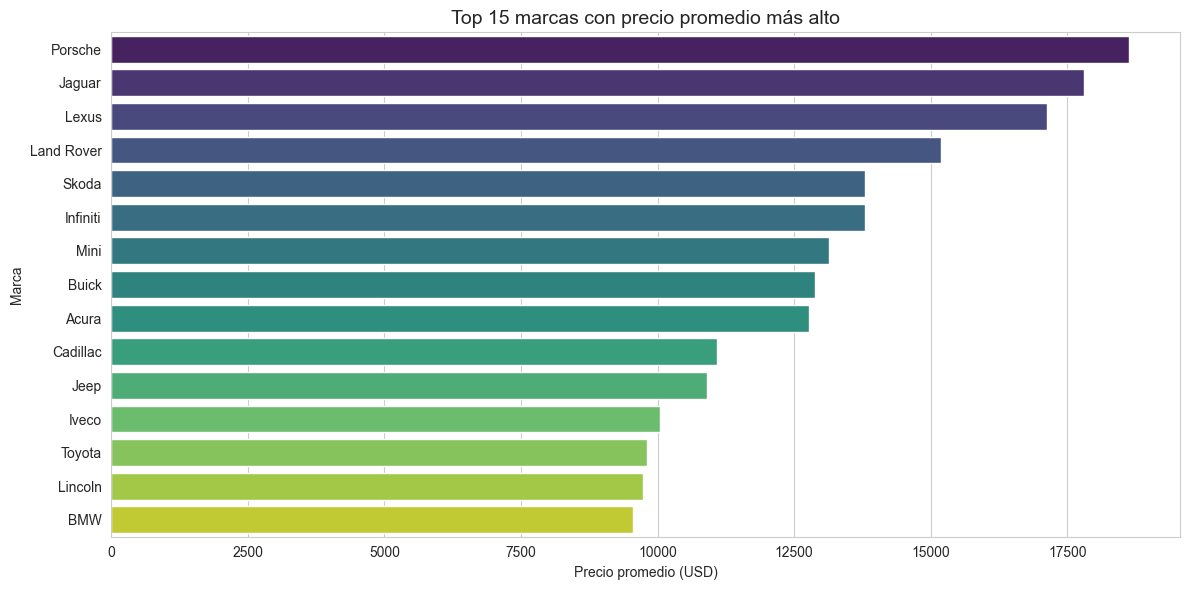

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por marca y calcular precio promedio
precio_promedio_marcas = df.groupby('manufacturer_name')['price_usd'].mean().sort_values(ascending=False)

# Mostrar las 10 marcas más caras y 10 más baratas
print("🔝 Marcas con precios promedio más altos:")
print(precio_promedio_marcas.head(10))

print("\n🔻 Marcas con precios promedio más bajos:")
print(precio_promedio_marcas.tail(10))

# Visualización: Top 15 marcas más caras
plt.figure(figsize=(12, 6))
sns.barplot(x=precio_promedio_marcas.head(15).values,
            y=precio_promedio_marcas.head(15).index,
            palette="viridis")
plt.title("Top 15 marcas con precio promedio más alto", fontsize=14)
plt.xlabel("Precio promedio (USD)")
plt.ylabel("Marca")
plt.tight_layout()
plt.show()


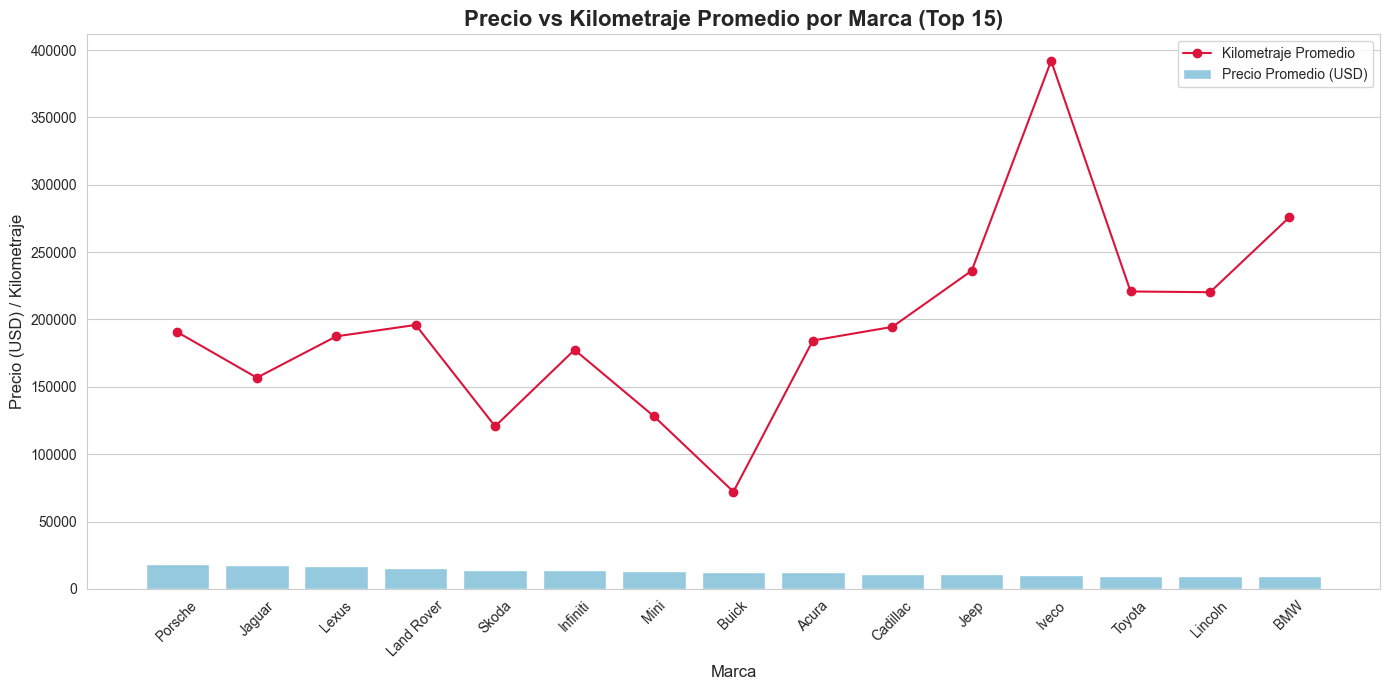

In [72]:
# Calcular precio promedio y kilometraje promedio por marca
marca_stats = df.groupby('manufacturer_name')[['price_usd', 'odometer_value']].mean().sort_values(by='price_usd', ascending=False).head(15)

# Estilo visual
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Graficar barra del precio promedio
sns.barplot(x=marca_stats.index, y=marca_stats['price_usd'], color='skyblue', label='Precio Promedio (USD)')

# Graficar línea del kilometraje promedio sobre las barras
plt.plot(marca_stats.index, marca_stats['odometer_value'], color='crimson', marker='o', label='Kilometraje Promedio')

# Etiquetas y título
plt.title("Precio vs Kilometraje Promedio por Marca (Top 15)", fontsize=16, fontweight='bold')
plt.xlabel("Marca", fontsize=12)
plt.ylabel("Precio (USD) / Kilometraje", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15092\2125112008.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='transmission', y='price_usd', palette='pastel', estimator='mean')


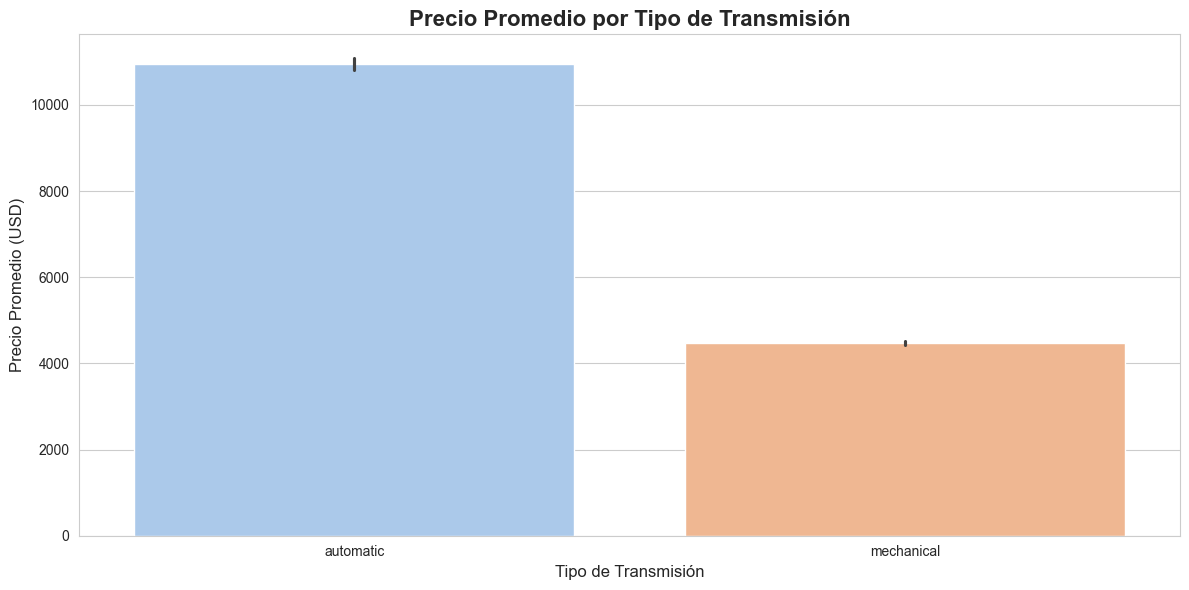

In [73]:
# Estilo visual
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Crear gráfico de barras del precio promedio por tipo de transmisión
sns.barplot(data=df, x='transmission', y='price_usd', palette='pastel', estimator='mean')

# Título y etiquetas
plt.title("Precio Promedio por Tipo de Transmisión", fontsize=16, fontweight='bold')
plt.xlabel("Tipo de Transmisión", fontsize=12)
plt.ylabel("Precio Promedio (USD)", fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15092\867493175.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='transmission', palette='Set2')


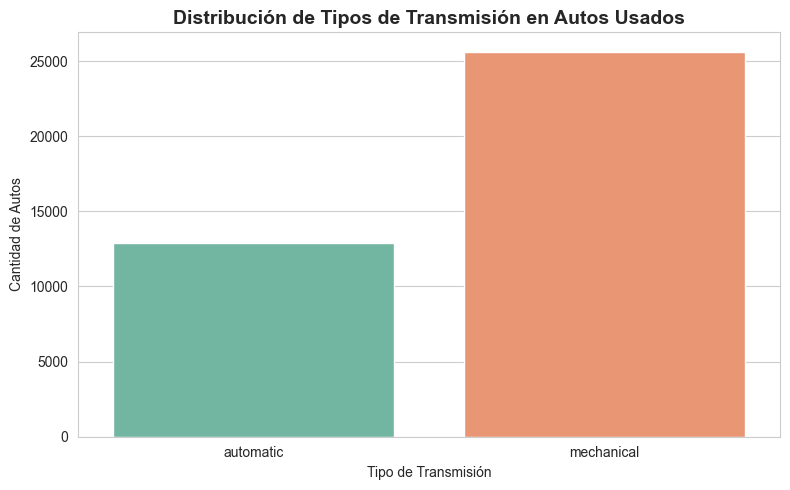

In [74]:
plt.figure(figsize=(8, 5))

# Conteo de cada tipo de transmisión
sns.countplot(data=df, x='transmission', palette='Set2')

plt.title("Distribución de Tipos de Transmisión en Autos Usados", fontsize=14, fontweight='bold')
plt.xlabel("Tipo de Transmisión")
plt.ylabel("Cantidad de Autos")
plt.tight_layout()
plt.show()


In [75]:
y='price_usd'


In [76]:
print(df.columns)


Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')


In [77]:
df.columns = df.columns.str.strip()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15092\924231870.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=precio_por_año, x='year_produced', y='price_usd', palette='viridis')


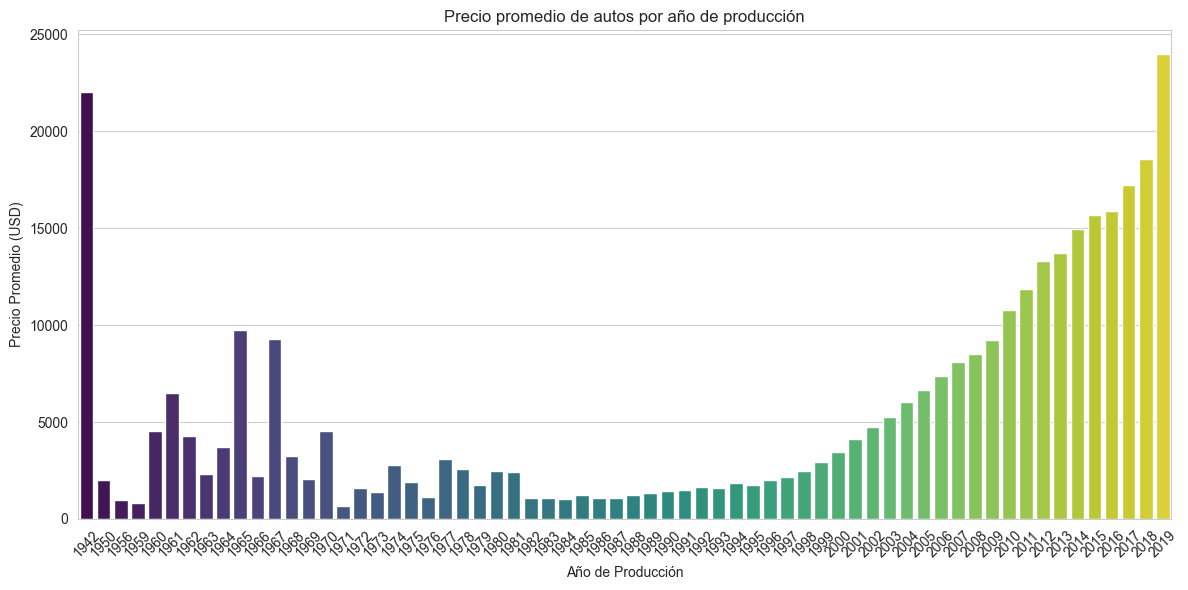

In [78]:
# Agrupar por año de producción y calcular el precio promedio
precio_por_año = df.groupby('year_produced')['price_usd'].mean().reset_index()

# Visualización con gráfico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=precio_por_año, x='year_produced', y='price_usd', palette='viridis')
plt.title("Precio promedio de autos por año de producción")
plt.xlabel("Año de Producción")
plt.ylabel("Precio Promedio (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15092\4244466244.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=precio_por_combustible, x='engine_fuel', y='price_usd', palette='viridis')


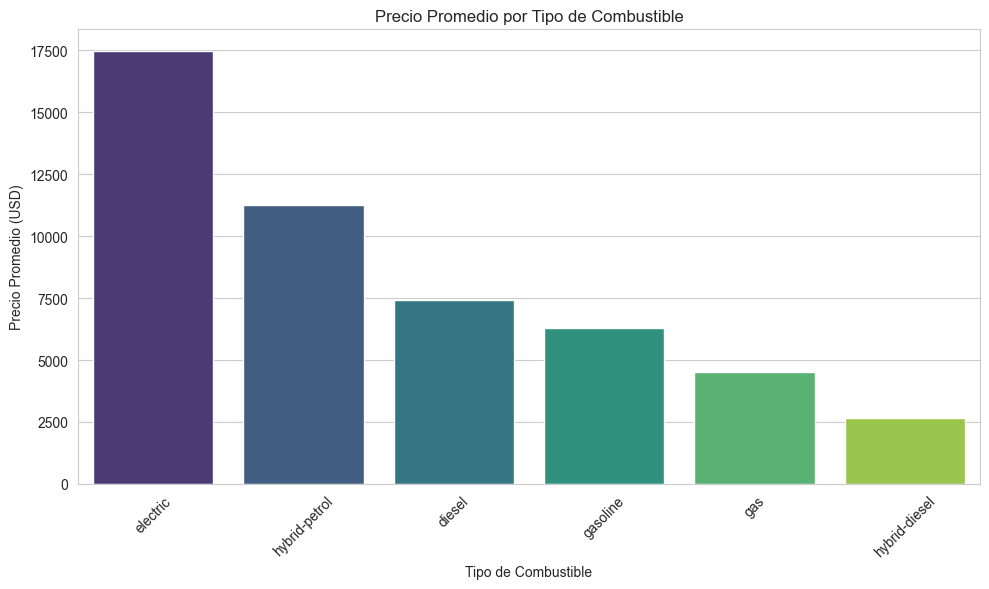

In [79]:
# Precio promedio por tipo de combustible
precio_por_combustible = df.groupby('engine_fuel')['price_usd'].mean().reset_index()

# Ordenar de mayor a menor
precio_por_combustible = precio_por_combustible.sort_values(by='price_usd', ascending=False)

# Gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=precio_por_combustible, x='engine_fuel', y='price_usd', palette='viridis')
plt.title("Precio Promedio por Tipo de Combustible")
plt.xlabel("Tipo de Combustible")
plt.ylabel("Precio Promedio (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Estregia de Inversion 
1. ¿Qué autos parecen ser una buena inversión?

In [59]:
# Precio promedio por marca y año
inversion_autos = df.groupby(['manufacturer_name', 'year_produced'])['price_usd'].mean().reset_index()

# Mostrar las marcas con autos más recientes y buen precio
autos_buena_inversion = inversion_autos[inversion_autos['year_produced'] > 2015].sort_values(by='price_usd')
print(autos_buena_inversion.head(10))  # Las más baratas entre autos recientes


     manufacturer_name  year_produced    price_usd
1340               ВАЗ           2016  6538.266667
390              Geely           2016  7196.976250
1341               ВАЗ           2017  7662.250000
260              Dacia           2017  7662.340000
605               LADA           2016  7957.885000
156              Chery           2016  8000.000000
606               LADA           2017  8073.828333
1148            Subaru           2017  8790.000000
683              Lifan           2016  8997.200000
1342               ВАЗ           2018  9717.376000


2. ¿Qué tipo de transmisión y combustible se venden mejor?

In [80]:
# Transmisión
transmision_count = df['transmission'].value_counts()
print("Autos por tipo de transmisión:\n", transmision_count)

# Combustible
combustible_count = df['engine_fuel'].value_counts()
print("\nAutos por tipo de combustible:\n", combustible_count)


Autos por tipo de transmisión:
 transmission
mechanical    25633
automatic     12898
Name: count, dtype: int64

Autos por tipo de combustible:
 engine_fuel
gasoline         24065
diesel           12872
gas               1347
hybrid-petrol      235
electric            10
hybrid-diesel        2
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15092\2425764602.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='transmission', palette='pastel')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15092\2425764602.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='engine_fuel', palette='Set2')


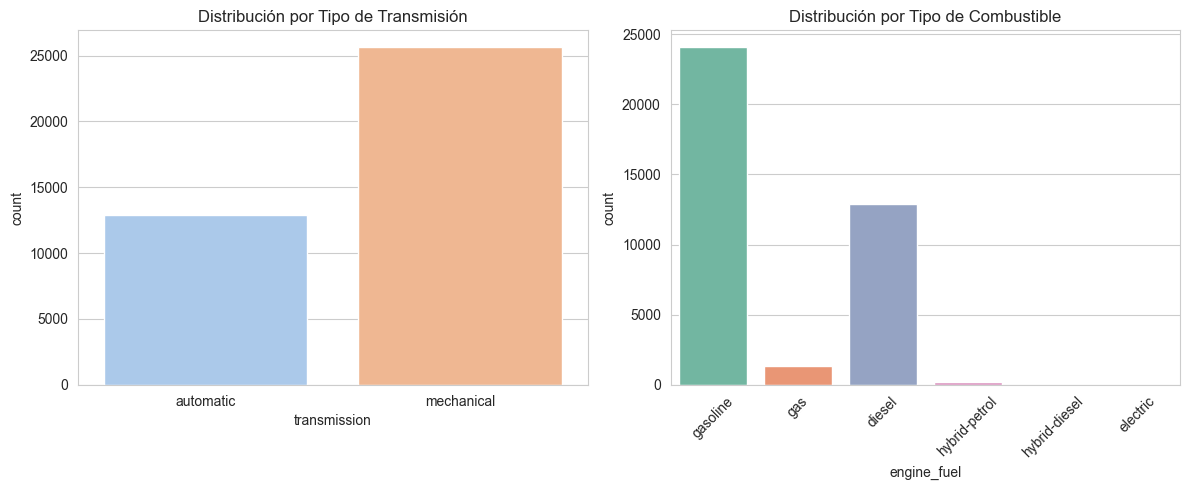

In [81]:
# Gráfica de barras
plt.figure(figsize=(12, 5))

# Transmisión
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='transmission', palette='pastel')
plt.title("Distribución por Tipo de Transmisión")

# Combustible
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='engine_fuel', palette='Set2')
plt.title("Distribución por Tipo de Combustible")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


3. ¿Qué factores afectan más el precio?

El año (year_produced) sube el precio.

Más kilometraje (odometer_value) lo baja.

Mayor capacidad de motor también eleva el precio.

In [82]:
# Seleccionamos solo variables numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])

# Calculamos la correlación con el precio
correlaciones = numericas.corr()['price_usd'].sort_values(ascending=False)
print("Correlaciones con el precio:\n", correlaciones)


Correlaciones con el precio:
 price_usd           1.000000
year_produced       0.705511
number_of_photos    0.316859
engine_capacity     0.296597
up_counter          0.057382
duration_listed     0.033524
odometer_value     -0.421204
Name: price_usd, dtype: float64


¿Qué autos evitarías? Autos que podrían no ser una buena compra:

Viejos y costosos.

Con mucha depreciación.

De poca demanda (pocos en venta = difícil de revender).

Con problemas conocidos de confiabilidad 

In [64]:
# Autos viejos y caros
autos_evitar = df[(df['year_produced'] < 2005) & (df['price_usd'] > 5000)]
print("Autos posiblemente a evitar:\n", autos_evitar[['manufacturer_name', 'model_name', 'year_produced', 'price_usd']].head(10))


Autos posiblemente a evitar:
     manufacturer_name model_name  year_produced  price_usd
3              Subaru    Impreza           1999     9999.0
10             Subaru   Forester           2003     6900.0
15             Subaru    Outback           2004     7300.0
29             Subaru     Legacy           2004     6200.0
58             Subaru   Forester           2003     6150.0
78             Subaru   Forester           2004     5800.0
88             Subaru   Forester           2003     5500.0
90             Subaru    Impreza           2003     7000.0
102            Subaru    Outback           2001     5250.0
104            Subaru    Outback           2004     6000.0
